In [20]:
from pandas import DataFrame, read_csv
from pandas.tools.plotting import parallel_coordinates
import pandas as pd
import seaborn as sns

In [11]:
file = 'Forbes2000.csv'
df = pd.read_csv(file)

In [12]:
df.head()

,Unnamed: 0,rank,name,country,category,sales,profits,assets,marketvalue
0,1,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
1,2,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
2,3,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
3,4,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
4,5,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54


# Task 1 
1: Produce one graph that summarises marketvalue of all companies of Forbes2000 so that you can compare the sectors (category) to see which typically has best marketvalue compared to either assets or profits. You may need to aggregate the data.
If you need to discard data points (rows of data or companies), please mention that. Data may be discarded if there are some computational difficulties in e.g. aggregation. (if the NA values are creating trouble, you may just remove those rows that contain NAs.

In [13]:
df = df.dropna()

In [16]:
df['marketvalue_assets'] = (df['marketvalue'] / df['assets'])
df['marketvalue_profits'] = (df['marketvalue'] / df['profits'])

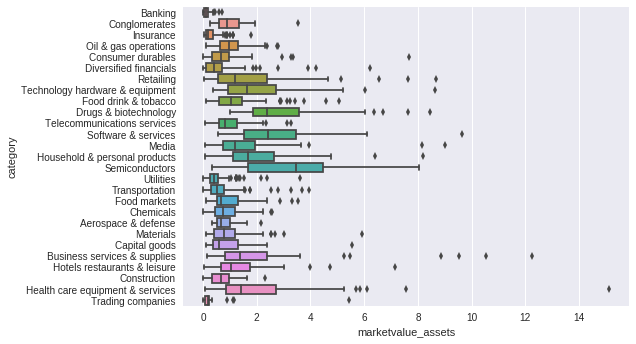

In [15]:
sns.boxplot(y='category', x='marketvalue_assets', data=df)

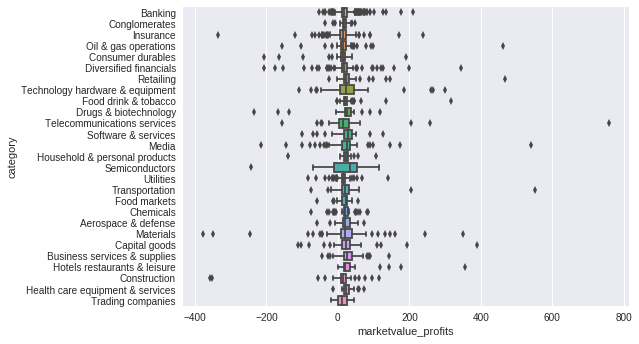

In [17]:
sns.boxplot(y='category', x='marketvalue_profits', data=df)

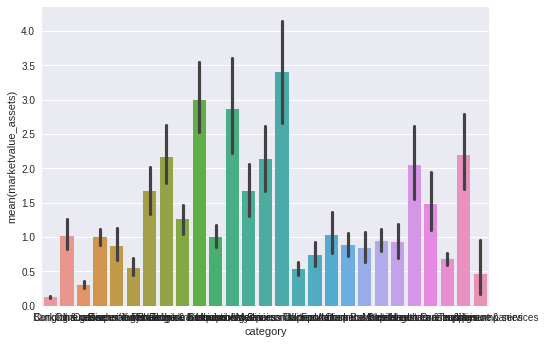

In [31]:
sns.barplot(y='marketvalue_assets', x='category', data=df)

# Task 2
Study what is parallel coordinate plot and apply it to three different visuals of the Forbes2000 data. Give all the complete data points to those figures


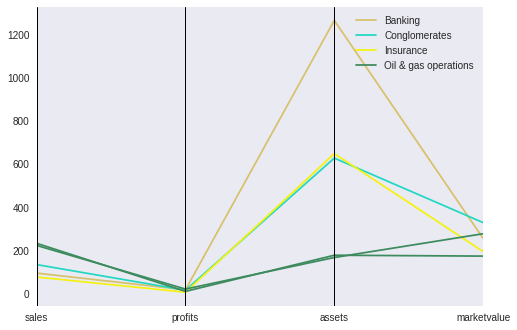

In [27]:
parallel_coordinates(df.head(5), class_column='category', cols=['sales', 'profits', 'assets', 'marketvalue'])